In [62]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [63]:
# Charger les données
file_path = "mushroom_cleaned.csv"  # Remplace par ton chemin de fichier
data = pd.read_csv(file_path)

In [64]:
# Aperçu des données
print("Aperçu des données :")
print(data.head())
print("\nInformations sur les données :")
print(data.info())

Aperçu des données :
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64 

In [65]:
# Statistiques descriptives 
print("\nStatistiques descriptives :")
print(data.describe().T)


Statistiques descriptives :
                   count         mean         std       min         25%  \
cap-diameter     54035.0   567.257204  359.883763  0.000000  289.000000   
cap-shape        54035.0     4.000315    2.160505  0.000000    2.000000   
gill-attachment  54035.0     2.142056    2.228821  0.000000    0.000000   
gill-color       54035.0     7.329509    3.200266  0.000000    5.000000   
stem-height      54035.0     0.759110    0.650969  0.000426    0.270997   
stem-width       54035.0  1051.081299  782.056076  0.000000  421.000000   
stem-color       54035.0     8.418062    3.262078  0.000000    6.000000   
season           54035.0     0.952163    0.305594  0.027372    0.888450   
class            54035.0     0.549181    0.497580  0.000000    0.000000   

                        50%          75%          max  
cap-diameter     525.000000   781.000000  1891.000000  
cap-shape          5.000000     6.000000     6.000000  
gill-attachment    1.000000     4.000000     6.00000

In [66]:
data.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [67]:
data.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

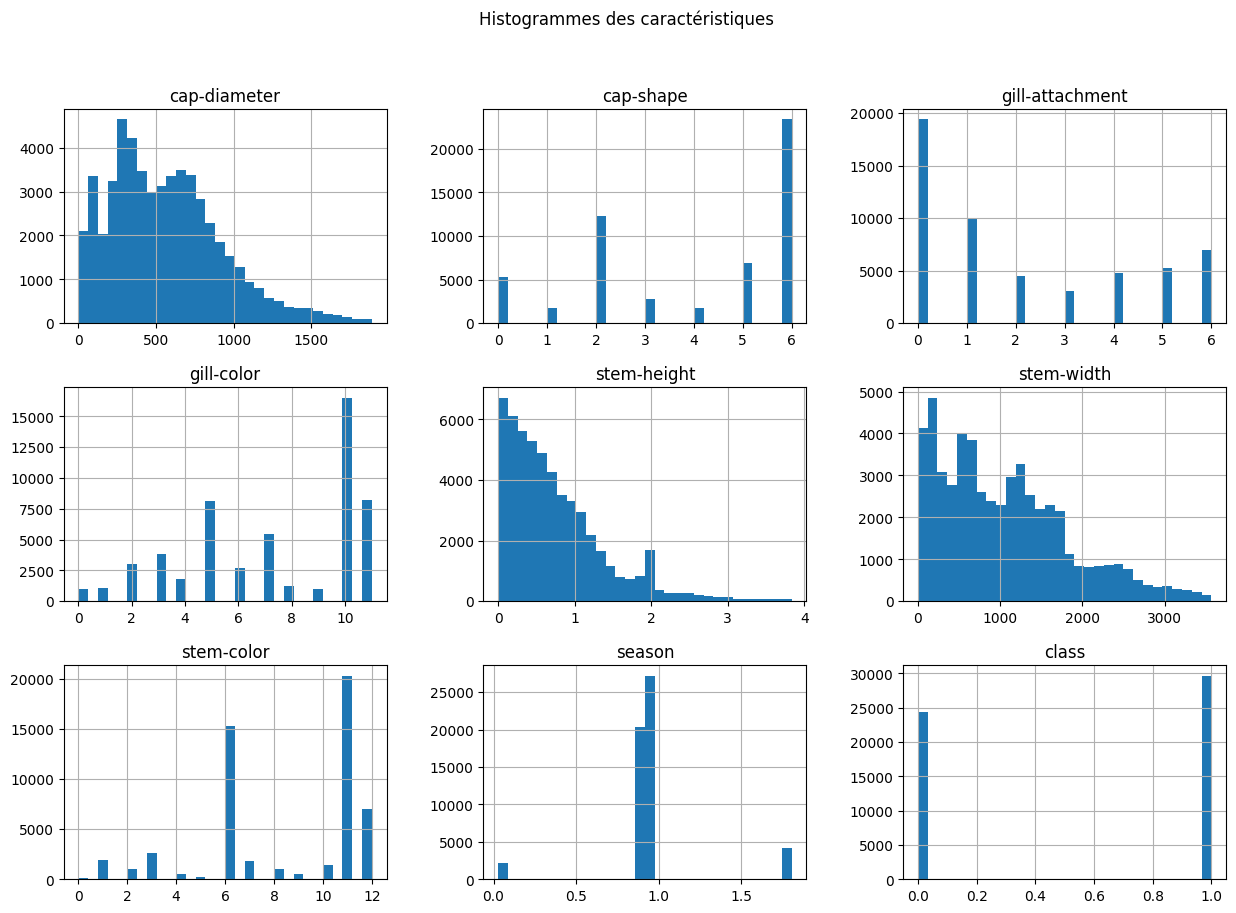

In [68]:
# Histogrammes pour chaque caractéristique 
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogrammes des caractéristiques")
plt.show()

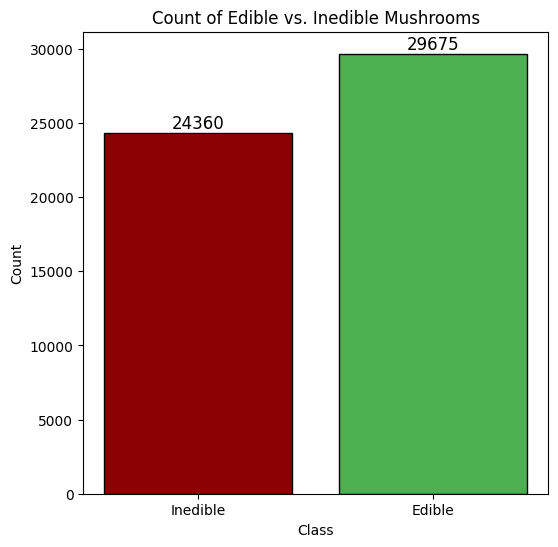

In [69]:
# Statistics on the number of edible and inedible mushrooms.
label_counts = data['class'].value_counts()

plt.figure(figsize=(6,6))
bars = plt.bar(label_counts.index, label_counts.values, color=['#4CAF50','darkred'], edgecolor='black')
plt.xticks(label_counts.index, labels=["Edible", "Inedible"])
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, # Position x: column center
        bar.get_height(),                  # Position y: height of the column
        int(bar.get_height()),             # Display value
        ha='center',                       
        va='bottom',                       
        fontsize=12                        
    )
plt.title("Count of Edible vs. Inedible Mushrooms")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

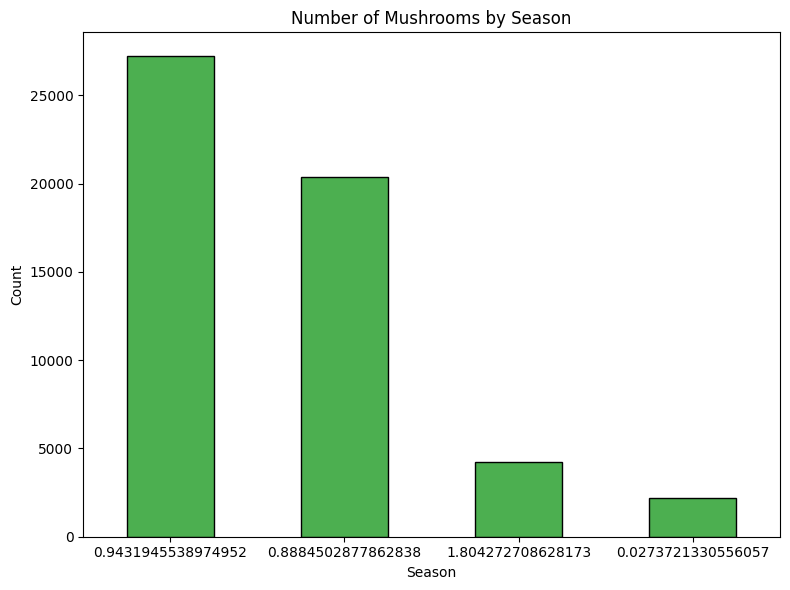

In [70]:
#Statistics on seasonal mushroom numbers.
season_counts = data['season'].value_counts()
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color='#4CAF50', edgecolor='black')
plt.title("Number of Mushrooms by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

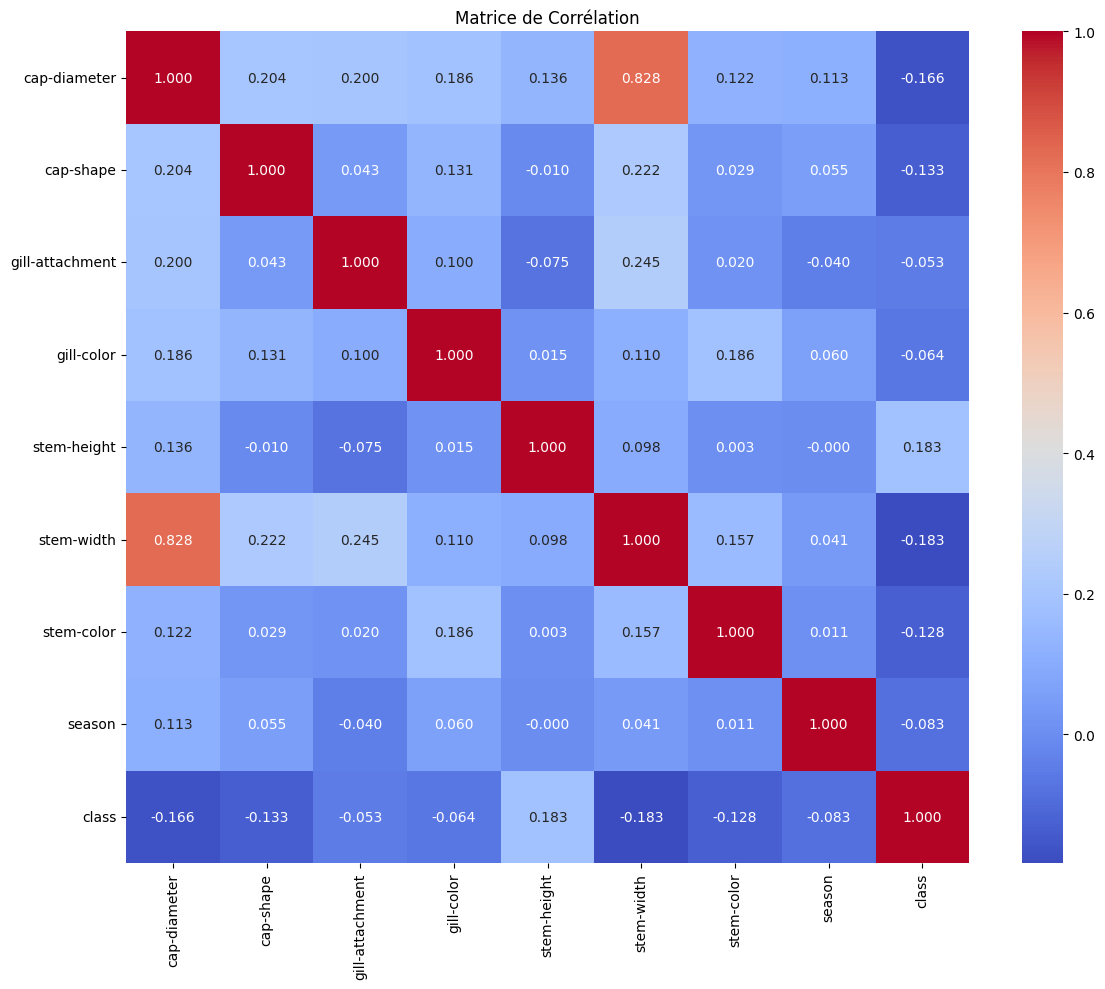

In [71]:
# Matrice de corrélation et heatmap 
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True,cbar=True,fmt='.3f', cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.tight_layout()
plt.show()

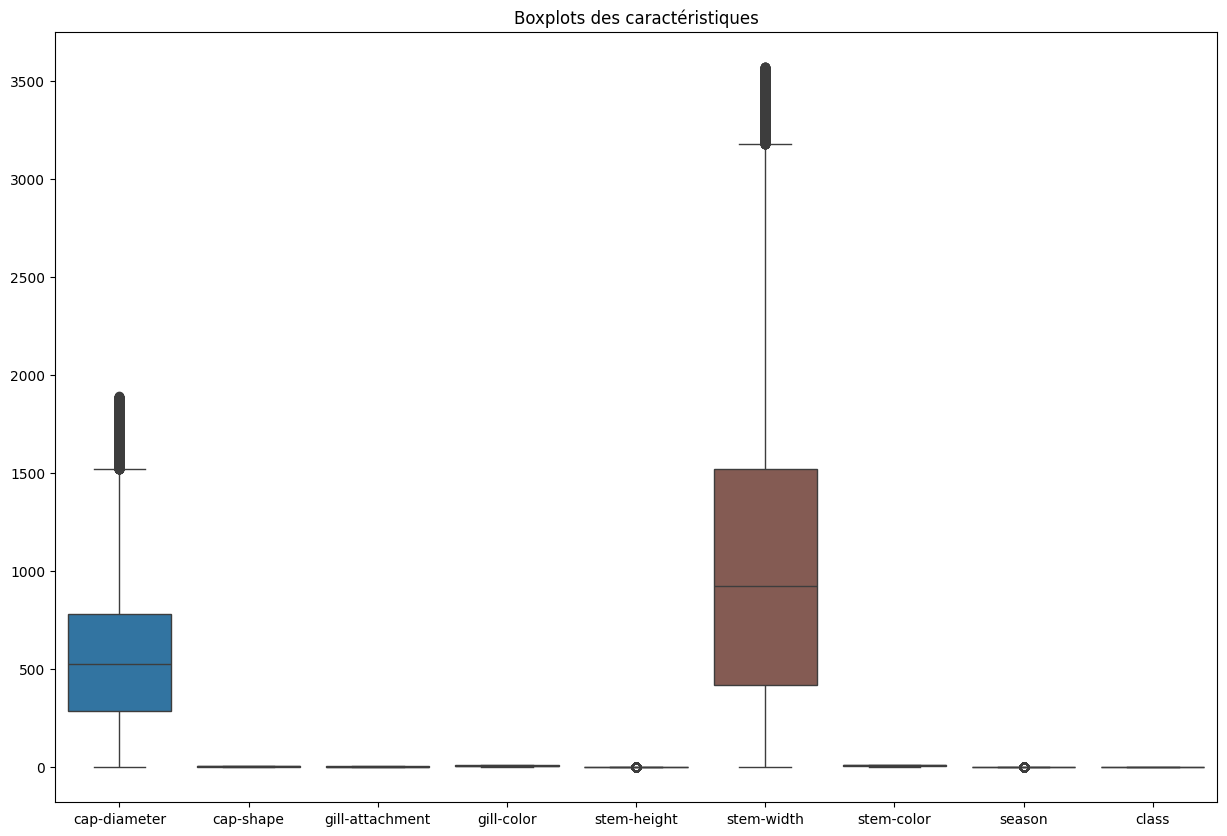

In [72]:
# Boxplots pour visualiser la distribution des valeurs 
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title("Boxplots des caractéristiques")
plt.show()

In [73]:
# Séparer les caractéristiques (features) et la classe cible (target) 
X = data.drop('class', axis=1) # Toutes les colonnes sauf 'class' 
y = data['class'] # Colonne cible
X.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


In [74]:
stander = StandardScaler()
X_preprocessed = stander.fit_transform(X)

In [75]:

# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2,shuffle=True, random_state=42)
X_train.shape, X_test.shape

((43228, 8), (10807, 8))

In [76]:
def Gridsearch_params(model, param_grid):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv = 5,
        verbose=1,  
        n_jobs=-1  
    )
    grid_search.fit(X, y)
    # Get the best model
    best_model = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)
    print("Best mean accuracy:", round(grid_search.best_score_ * 100, 2), "%\n")
    
    return best_model

In [77]:
def evolution_models(model):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------")

    labels = data['class'].unique()
    labels = list(labels)

    # Caculater to Confution Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confution matrix heatmap:")
    plt.xlabel("Actual labels")
    plt.ylabel("Predicted labels")
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807

------------------------------------------


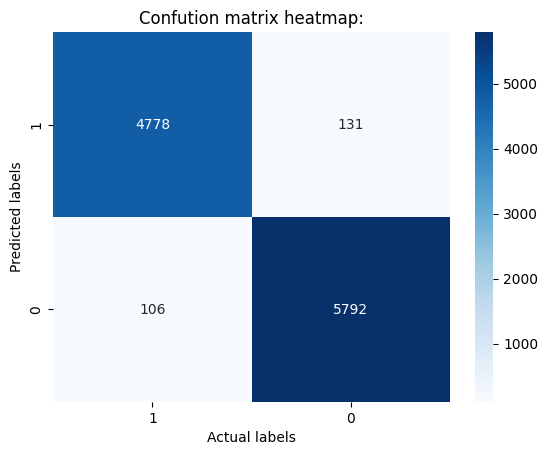

In [78]:
#Decision Tree
base_tree = DecisionTreeClassifier().fit(X_train, y_train)
evolution_models(base_tree)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807

------------------------------------------


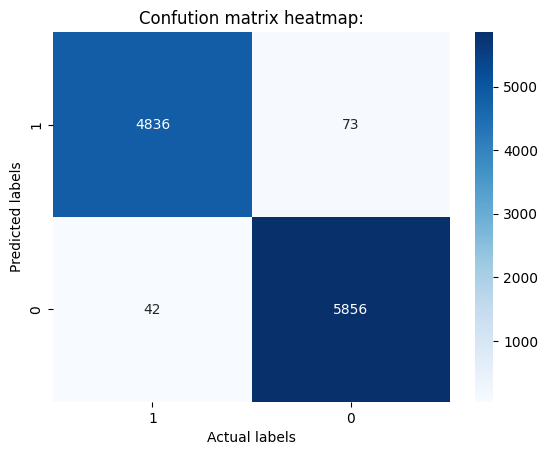

In [79]:
#K-nearest neighbors
base_KNN = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
evolution_models(base_KNN)

In [80]:
# Créer et entraîner un modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [82]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(conf_matrix)


Matrice de confusion :
[[4856   53]
 [  45 5853]]


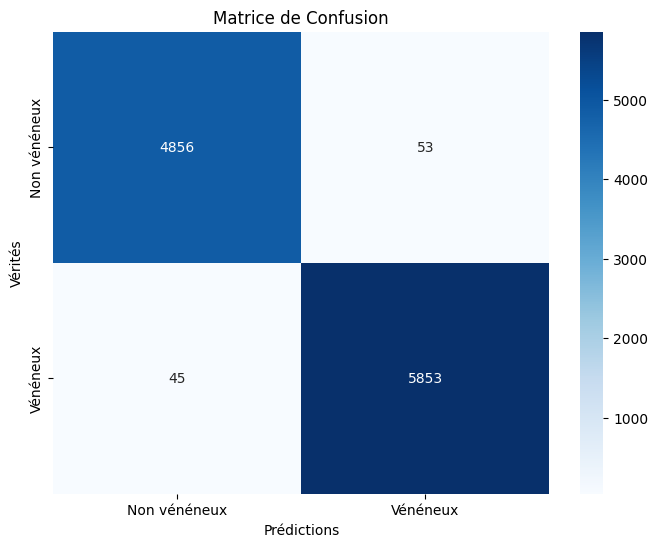

In [83]:
# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non vénéneux", "Vénéneux"], yticklabels=["Non vénéneux", "Vénéneux"])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Text(0, 0.5, 'Error Rate')

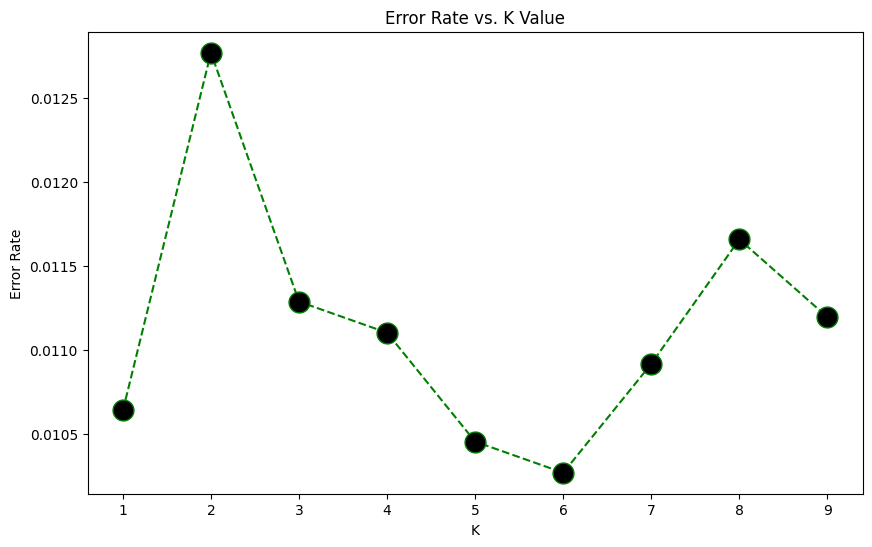

In [84]:
error_rates = []
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rates, color='green', linestyle='dashed', marker='o', markerfacecolor='black', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')